# TP 5: Équation de transport en 1D

On s'intéresse à la résolution numérique de l'équation de transport sur $[0,T]\times [0,1]$ avec une vitesse variable $b$ avec des conditions au bord périodiques. On cherche donc $\newcommand{\Rsp}{\mathbb{R}}
u: [0,T]\times \Rsp$ vérifiant l'équation

$$
(T)\quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(t,x) + b(x) \frac{\partial u}{\partial x}(t,x) = 0  \hbox{ sur } [0,1]\times ]0,T]\\
&u(t,x+1) = u(t,x) \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right.,
$$

où l'on suppose que $b: \Rsp\to\Rsp$ est également $1$-périodique: $b(x+1) = b(x)$.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Cas d'une vitesse constante ($b(x)=c\in\mathbb{R}$)
Soit $M$ le nombre de pas d'espace, $x_j = h j$ où $h=1/M$ et $0\leq j\leq M-1$. Par périodicité, on a $u(x_M) = u(x_0)$ et il est donc inutile d'encoder le dernier point. La discrétisation du temps est la même que d'habitude, c'est-à-dire
$t_n = n \tau$ où $\tau = T/N$ et $0\leq n\leq N$. On considère deux discrétisations possibles de l'opérateur $\partial/\partial x$:

$$ (\mathrm{D}^+_h u)_j = \frac{u_{j+1} - u_j}{h} \hbox{ et } (\mathrm{D}^-_{h} u)_j = \frac{u_{j} - u_{j-1}}{h}, $$

pour $0\leq j\leq M-1$, où l'on a posé implicitement $u^n_{M} = u^n_0$ et $u^n_{-1} = u^n_{M-1}$. Pour $c\geq 0$ on considère le schéma 

$$
\begin{cases}
\dfrac{u^{n+1} - u^n}{\tau} + c \mathrm{D}^-_h u^n = 0 & \hbox{ pour } 1\leq j \leq M-1, 0\leq n \leq N-1 \\
u_j^0 = u_0(x_j) & \hbox{ pour } 0\leq j\leq M-1\\
\end{cases}
$$



**Q1)** Écrire une fonction DP(u,h) retournant le vecteur des dérivées discrètes à droite et DM(u,h) retournant le vecteur des dérivées discrètes à gauche, en prenant en compte la périodicité (deuxième équation du schéma). *(on peut s'aider de la fonction np.roll).*

In [2]:
def DM(u,h):
    return (u-np.roll(u,1))/h

def DP(u,h):
    return (np.roll(u,-1)-u)/h


**Q2)** Comparer numériquement les schémas décentrés avec $\mathrm{D}_h^-$ et $\mathrm{D}_h^+$ et:

$$ c=1, \quad  u_0(x) = e^{-100(x-0.4)^2}, \quad T=0.9, M=N=300$$

Vérifier en particulier l'instablité inconditionnelle du schéma décentré aval.

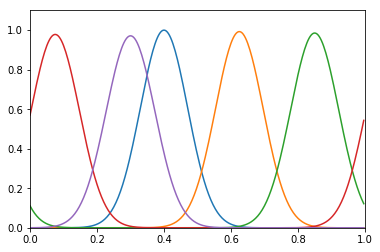

In [3]:
c = 1.0
M = 300
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
N = 300
tau = .9/N

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = u - c * tau * DM(u,h)
    #u = u - c * tau * DP(u,h)  # instable


**Q3)** On suppose dans cette question que $M=2m$, et on pose $u^0_j = (-1)^j$. Soit $(u^n)_{n\geq 0}$ déterminé par le schéma avec $D_h^+$ : 

$$ u^{n+1} = u^n - \tau cD^+_h u^n. $$

Donner une formule explicite pour $u^{n}$, en déduire que le schéma est instable.

**Q4)** Constater la forte diffusion numérique induite par le schéma lorsque $|c|\frac{\tau}{h} \ll 1$.

CFL=0.040000


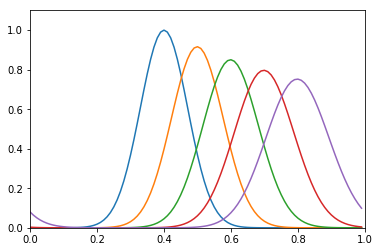

In [4]:
c = 1.0
M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
N = 1000
tau = .4/N
print("CFL=%f" % (np.abs(c)*tau/h))

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = u - c * tau * DM(u,h)
plt.show()


**Q5)** Considérer le schéma décentré amont d'ordre deux en espace, construit en posant

$$(\mathrm{D}^{-,2}_{h} u)_j = \frac{3u_{j} - 4u_{j-1} + u_{j-2}}{2h} \qquad (\mathrm{D}^{+,2}_{h} u)_j = \frac{-3u_{j} + 4u_{j+1} - u_{j+2}}{2h}$$

Si $c \geq 0$ on posera 

$$ u^{n+1} = u^n - \tau c \mathrm{D}_h^{-,2} u^n $$

Étudier la consistance de ce schéma. Comparer numériquement au schéma d'ordre 1 (via une fonction DM2(u,h)).

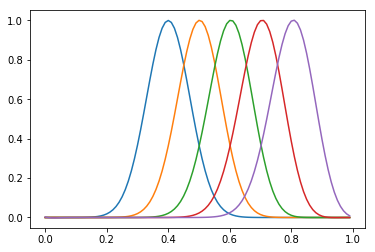

In [5]:
def DM2(u,h):
    return (3.0*u-4.0*np.roll(u,1)+np.roll(u,2))/(2.0*h)
def DP2(u,h):
    return (-3.0*u+4.0*np.roll(u,-1)-np.roll(u,-2))/(2.0*h)

c = 1.0
M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
N = 1000
tau = .4/N
for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
    u = u - c * tau * DM2(u,h)


## 2. Le schéma de Lax-Wendroff
On considère le schéma suivant, où l'on adopte la convention $u_M^n = u_0^n$:

$$ 
\begin{cases}
\dfrac{u_j^{n+1} - u_j^n}{\tau} + b \dfrac{u_{j+1}^n - u_{j-1}^n}{2h} - b^2 \tau \dfrac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2} = 0 & \hbox{ pour } n\geq 0, 0\leq j\leq M-1 \\
u_M^n = u_0^n \\
u_j^0 = u_0(x_j) 
\end{cases}
$$

**Q6)** En prenant pour condition initiale une gaussienne (comme dans la partie 1), vérifier que le schéma n'induit pas de diffusion numérique.

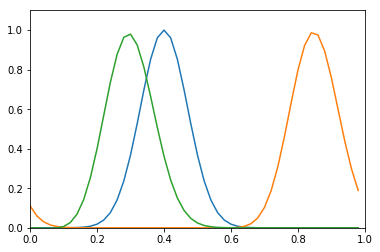

In [6]:
c = 1.0
M = 50
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
u = np.exp(-100.0*np.power(x-.4,2))
N = 50
tau = .9/N
alpha = c*tau/h

for i in range(N+1):
    if i%(N/4)==0:
        
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    up = np.roll(u,-1)
    um = np.roll(u,1)
    u = (alpha**2+alpha)/2 * um  + (1-alpha**2) * u + (alpha**2-alpha)/2 * up


**Q7)** En prenant comme condition initiale un créneau (par exemple, $u_0 = \chi_{[0.4, 0.6]}$), montrer que le schéma ne vérifie pas le principe du maximum discret.

0.08999999999999998


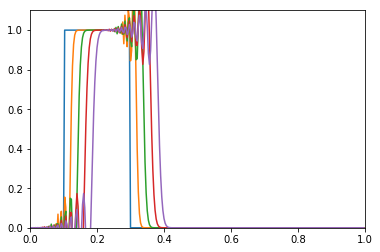

In [7]:
c = 1.0
M = 300
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
u = np.zeros(M)
u[abs(x -.2) < .1] = 1
N = 300
tau = .09/N
alpha = c*tau/h
print(alpha)

for i in range(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    up = np.roll(u,-1)
    um = np.roll(u,1)
    u = (alpha**2+alpha)/2 * um  + (1-alpha**2) * u + (alpha**2-alpha)/2 * up
